In [16]:
from pathlib import Path

import lightning.pytorch as pl
from lightning.pytorch.tuner import Tuner

from dinora import PROJECT_ROOT
from dinora.models.torchnet.resnet import *
from dinora.datamodules import CompactDataModule

In [3]:
model = ResNetLight(
    res_channels=128,
    res_blocks=10,
    policy_channels=64,
    value_channels=16,
    value_lin_channels=64,
    learning_rate=0.8,
)

In [17]:
ccrl = CompactDataModule(
    # dataset_folder=dataset_dir,
    dataset_folder=PROJECT_ROOT / 'data' / 'converted_dataset', # local
    batch_size=2048
)

In [30]:
import torch
torch.set_float32_matmul_precision('high')

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
DEBUG:fsspec.local:open file: c:/Users/saegl/projects/python/dinora/jupyter/.lr_find_984efeff-7127-4d44-8934-5a6f94a35de2.ckpt


Swith to C:\Users\saegl\projects\python\dinora\data\converted_dataset\1.pgntest.npz
Swith to C:\Users\saegl\projects\python\dinora\data\converted_dataset\1.pgntrain.npz


Finding best initial lr: 100%|██████████| 50/50 [00:28<00:00,  1.73it/s]
Learning rate set to 0.62
Restoring states from the checkpoint path at c:\Users\saegl\projects\python\dinora\jupyter\.lr_find_984efeff-7127-4d44-8934-5a6f94a35de2.ckpt
DEBUG:fsspec.local:open file: c:/Users/saegl/projects/python/dinora/jupyter/.lr_find_984efeff-7127-4d44-8934-5a6f94a35de2.ckpt
Restored all states from the checkpoint at c:\Users\saegl\projects\python\dinora\jupyter\.lr_find_984efeff-7127-4d44-8934-5a6f94a35de2.ckpt
DEBUG:fsspec.local:open file: c:/Users/saegl/projects/python/dinora/jupyter/lightning_logs/version_6/hparams.yaml
C:\Users\saegl\AppData\Local\Temp\ipykernel_12380\1409596999.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


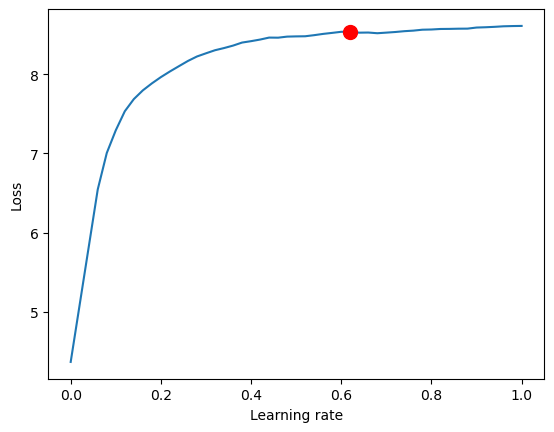

In [35]:
trainer = pl.Trainer()
tuner = Tuner(trainer)
lr_finder = tuner.lr_find(
    model,
    datamodule=ccrl,
    min_lr=1e-100,
    max_lr=1,
    mode='linear',
    num_training=50,
)
fig = lr_finder.plot(suggest=True)
fig.show()

In [34]:
lr_finder.suggestion()

0.62

In [25]:
1e-3

0.001